In [1]:
import os
import math

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

%matplotlib inline

### Load Training Data

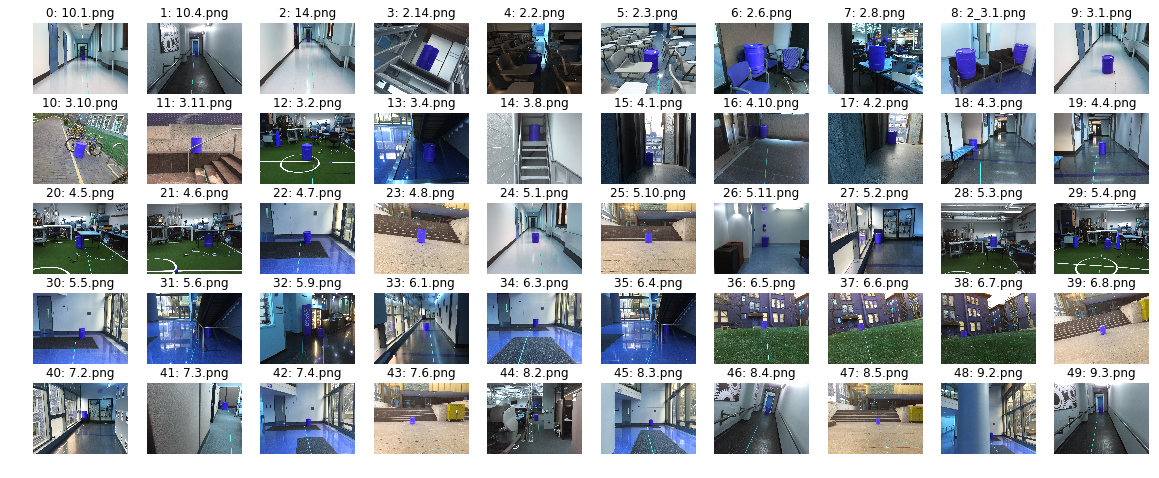

In [2]:
dir_train = "./2019Proj1_train/"
train_list = os.listdir(dir_train)
train_X = []

PLT_COL = 10 
PLT_ROW = int(math.ceil(len(train_list) / float(PLT_COL)))

plt.figure(figsize=[20, 8])
for i in range(len(train_list)):
    pic = cv2.imread(dir_train + train_list[i])
    plt.subplot(PLT_ROW, PLT_COL, i + 1)
    plt.imshow(pic)
    plt.axis("off")
    plt.title(str(i) + ": " + train_list[i])
    train_X.append(pic)

train_X = np.array(train_X)

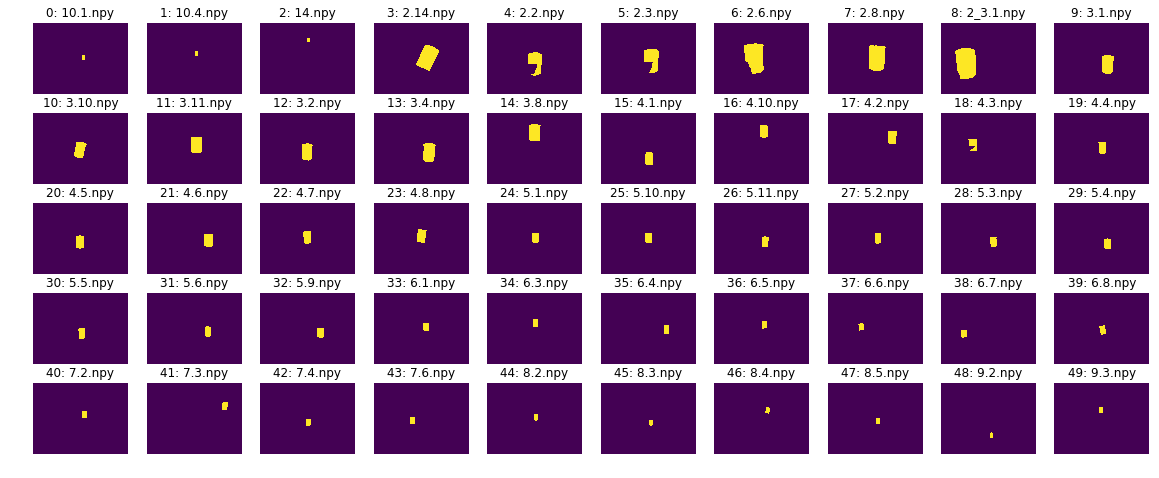

In [3]:
dir_labeled_train = "./labeled_train/"
label_list = os.listdir(dir_labeled_train)
train_Y = []

PLT_COL = 10 
PLT_ROW = int(math.ceil(len(label_list) / float(PLT_COL)))

plt.figure(figsize=[20, 8])
for i in range(len(label_list)):
    labeled = np.load(dir_labeled_train + label_list[i])
    plt.subplot(PLT_ROW, PLT_COL, i + 1)
    plt.imshow(labeled)
    plt.axis("off")
    plt.title(str(i) + ": " + label_list[i])
    train_Y.append(labeled)

train_Y = np.array(train_Y)

### Color Space Conversion

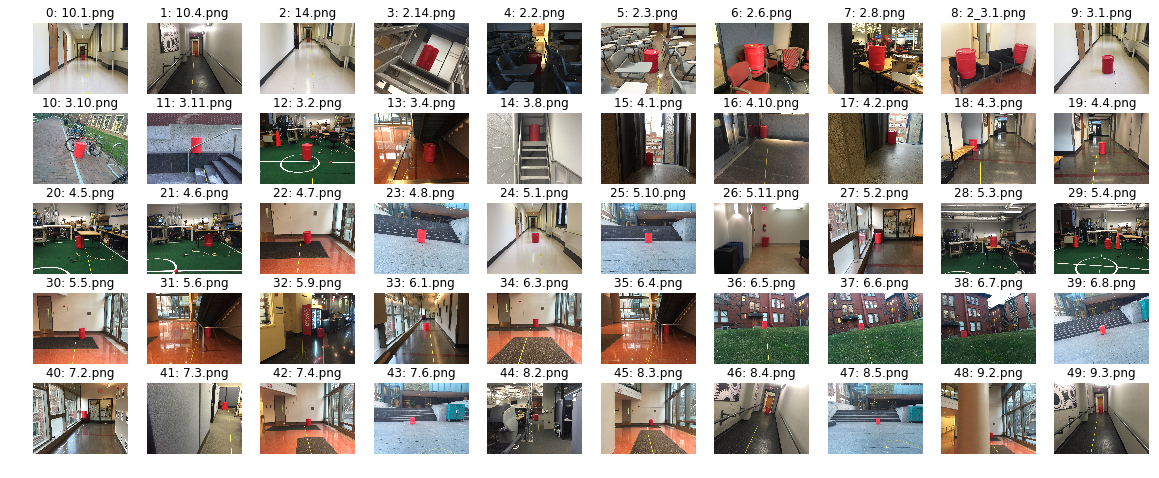

In [41]:
PLT_COL = 10 
PLT_ROW = int(math.ceil(len(train_X) / float(PLT_COL)))
#COLOR_BGR2YCR_CB
conv_train_X = []
plt.figure(figsize=[20, 8])
for i in range(len(train_X)):
    conv_img = cv2.cvtColor(train_X[i], cv2.COLOR_BGR2RGB)
    plt.subplot(PLT_ROW, PLT_COL, i + 1)
    plt.imshow(conv_img)
    plt.axis("off")
    plt.title(str(i) + ": " + train_list[i])
    conv_train_X.append(conv_img)
    
conv_train_X = np.array(conv_train_X)

#### Hold-out 20% for Testing

In [42]:
x_train, x_test, y_train, y_test = train_test_split(conv_train_X, train_Y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((40, 900, 1200, 3), (10, 900, 1200, 3), (40, 900, 1200), (10, 900, 1200))


In [43]:
x_train_px = np.reshape(x_train, (40 * 900 * 1200, 3))
y_train_px = np.reshape(y_train, (40 * 900 * 1200))
x_test_px = np.reshape(x_test, (10 * 900 * 1200, 3))
y_test_px = np.reshape(y_test, (10 * 900 * 1200))
print "x_train_px: ", x_train_px.shape
print "y_train_px: ", y_train_px.shape
print "x_test_px: ", x_test_px.shape
print "y_test_px: ", y_test_px.shape

x_train_px:  (43200000, 3)
y_train_px:  (43200000,)
x_test_px:  (10800000, 3)
y_test_px:  (10800000,)


### GMM

In [44]:
%%time 

model = GaussianMixture(n_components=10)
model.fit([x_train_px[i] for i in range(len(x_train_px)) if y_train_px[i]])

# model = GaussianMixture(n_components=2)
# model.fit(x_train_px, y_train_px)

CPU times: user 1min 36s, sys: 21.1 s, total: 1min 57s
Wall time: 51.4 s


In [ ]:
predicts = []
THRESH = -12
N_ROW = 900
N_COL = 1200
for i in range(len(x_test)):
    res = model.score_samples(x_test[i].reshape(N_ROW * N_COL, 3))
    predicts.append(np.reshape([True if x > THRESH else False for x in res], (N_ROW, N_COL)))
    

PLT_COL = 3 
PLT_ROW = len(y_test)

plt.figure(figsize=[7, 20])
for i in range(len(y_test)):
    plt.subplot(PLT_ROW, PLT_COL, i * PLT_COL + 1)
    plt.imshow(x_test[i])
    plt.axis("off")
    plt.subplot(PLT_ROW, PLT_COL, i * PLT_COL + 2)
    plt.imshow(y_test[i])
    plt.axis("off")
    plt.subplot(PLT_ROW, PLT_COL, i * PLT_COL + 3)
    plt.imshow(predicts[i])
    plt.axis("off")